In [3]:
from environnement.small_loop import small_loop
from model.Tokenizer import SimpleTokenizerV1
from environnement.gridWorld import gridWorld

In [ ]:
dict_test = {}
dict_test.update({'empty': {"action": "feel",'expected':0 }})
dict_test.update({'wall': {"action": "feel",'expected':0 }})
print(dict_test)

{'empty': {'action': 'fell', 'expected': 0}, 'wall': {'action': 'fell', 'expected': 0}}


In [2]:
dict_test_child = [{
    "action": "forward",
    "expected_valence": -20
},
{
    "action": "feel",
    "expected_valence": -10
},
{
    "action": "turn",
    "expected_valence": -40
}]
best_child = max(dict_test_child, key=lambda x: x["expected_valence"])
print(best_child)

{'action': 'feel', 'expected_valence': -10}


The robot is in : 0  x: 1 y: 1
World : [[1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 1 0 0 0 1 1]
 [1 0 1 0 0 1 1 0 0 1]
 [1 0 1 1 1 0 0 1 0 1]
 [1 0 0 1 0 0 0 0 0 1]
 [1 1 0 0 0 1 1 0 1 1]
 [1 1 1 1 1 1 1 1 1 1]]


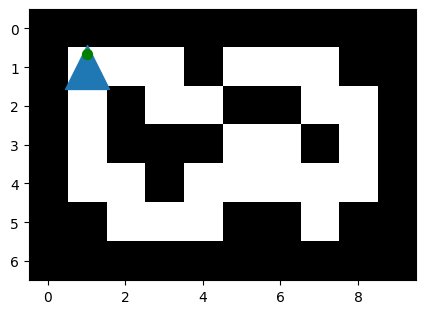

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 0, 0, 1, 0, 0, 0, 1, 1],
       [1, 0, 1, 0, 0, 1, 1, 0, 0, 1],
       [1, 0, 1, 1, 1, 0, 0, 1, 0, 1],
       [1, 0, 0, 1, 0, 0, 0, 0, 0, 1],
       [1, 1, 0, 0, 0, 1, 1, 0, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [8]:
import numpy as np
env = gridWorld(x=1, y=1, theta=0, world=np.array([
                [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                [1, 0, 0, 0, 1, 0, 0, 0, 1, 1],
                [1, 0, 1, 0, 0, 1, 1, 0, 0, 1],
                [1, 0, 1, 1, 1, 0, 0, 1, 0, 1],
                [1, 0, 0, 1, 0, 0, 0, 0, 0, 1],
                [1, 1, 0, 0, 0, 1, 1, 0, 1, 1],
                [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                
            ]))

env.display_world()
env.get_world()


In [47]:
env.outcome("forward")

'empty'

In [45]:
env.outcome("turn_right")


'empty'

wall


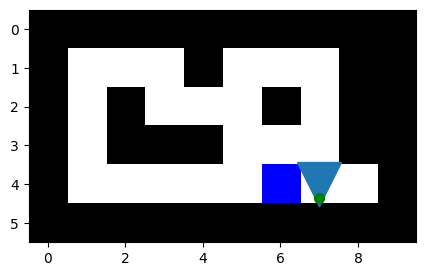

In [41]:
print(env.outcome("feel_right"))
env.display_world()

empty


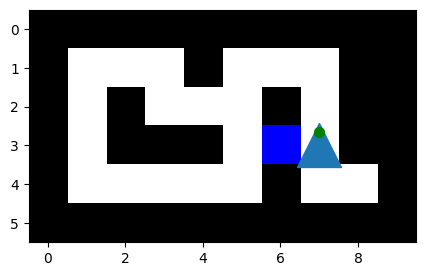

In [48]:
print(env.outcome("feel_left"))
env.display_world()

wall


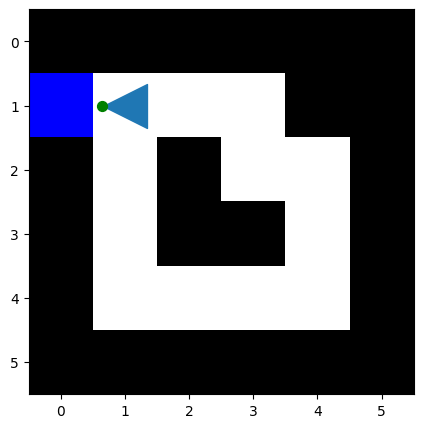

In [8]:
print(env.outcome("feel_front"))
env.display_world()

In [21]:
# 100 act rand
acts = []
fbs = []
interactions = []

for _ in range(1000):
    act = str(np.random.choice(env.get_actions()))
    fb = env.outcome(act)
    acts.append(act)
    fbs.append(fb)
    interactions += [act, fb]

In [11]:
print(interactions)

['turn_right', 'empty', 'feel_front', 'empty', 'turn_left', 'empty', 'feel_left', 'wall', 'forward', 'empty', 'turn_left', 'empty', 'forward', 'wall', 'feel_left', 'empty', 'turn_left', 'empty', 'feel_right', 'wall', 'feel_right', 'wall', 'feel_left', 'wall', 'turn_right', 'empty', 'turn_left', 'empty', 'forward', 'empty', 'feel_right', 'wall', 'feel_right', 'wall', 'turn_right', 'empty', 'turn_right', 'empty', 'turn_right', 'empty', 'feel_front', 'empty', 'turn_left', 'empty', 'feel_right', 'empty', 'feel_front', 'empty', 'forward', 'empty', 'turn_right', 'empty', 'turn_right', 'empty', 'turn_right', 'empty', 'feel_right', 'empty', 'turn_right', 'empty', 'turn_left', 'empty', 'turn_left', 'empty', 'feel_left', 'wall', 'feel_right', 'wall', 'forward', 'empty', 'feel_front', 'empty', 'feel_front', 'empty', 'feel_right', 'wall', 'feel_left', 'empty', 'feel_left', 'empty', 'forward', 'wall', 'turn_left', 'empty', 'forward', 'empty', 'feel_left', 'wall', 'turn_right', 'empty', 'turn_left',

In [26]:
def find_sub_list(liste):
    pattern = {}
    
    for i in range(0, len(liste) - 4, 2):
        if pattern.get(str(liste[i:i+3])) == None:
            pattern[str(liste[i:i+3])] = {"fb":liste[i + 3], "count":1}
        else:
            if pattern[str(liste[i:i+3])]["count"] != -1:
                pattern[str(liste[i:i+3])]["count"] += 1
            if pattern[str(liste[i:i+3])]["fb"] != liste[i + 3]:
                pattern[str(liste[i:i+3])]["count"] = -1
    return pattern

find_sub_list(interactions)

{"['feel_front', 'wall', 'feel_front']": {'fb': 'wall', 'count': 30},
 "['feel_front', 'wall', 'turn_right']": {'fb': 'empty', 'count': 17},
 "['turn_right', 'empty', 'turn_left']": {'fb': 'empty', 'count': 23},
 "['turn_left', 'empty', 'turn_right']": {'fb': 'empty', 'count': 31},
 "['turn_right', 'empty', 'turn_right']": {'fb': 'empty', 'count': 24},
 "['turn_right', 'empty', 'forward']": {'fb': 'wall', 'count': -1},
 "['forward', 'wall', 'feel_left']": {'fb': 'wall', 'count': -1},
 "['feel_left', 'wall', 'forward']": {'fb': 'wall', 'count': -1},
 "['forward', 'wall', 'turn_right']": {'fb': 'empty', 'count': 10},
 "['turn_right', 'empty', 'feel_front']": {'fb': 'empty', 'count': -1},
 "['feel_front', 'empty', 'turn_left']": {'fb': 'empty', 'count': 11},
 "['turn_right', 'empty', 'feel_right']": {'fb': 'wall', 'count': -1},
 "['feel_right', 'wall', 'feel_right']": {'fb': 'wall', 'count': 18},
 "['feel_right', 'wall', 'feel_front']": {'fb': 'wall', 'count': -1},
 "['feel_front', 'wall'

In [ ]:
def replace_sub_list(liste, pattern:dict):
    new_list = []
    list_pattern = pattern.keys()
    for i in range(0, len(liste) - 4, 2):
        if 
        
    return pattern

In [10]:
dicco = {
    'a': 0,
    'b': 1,
    'c': 3,
    'd': 4,
    'e': 5,
    'f': 6,
    'g': 7,
    'h': 8,
    'i': 9,
    'j': 10,
}

tokenizer = SimpleTokenizerV1(dicco)

data = CustomLoader(['a', 'b', 'c', 'd', 'e'], ['a', 'b', 'a', 'b', 'b'], 3, tokenizer)
print(data.__len__())
for i in range(data.__len__()):
    print(data.__getitem__(i))
    print('---')

NameError: name 'CustomLoader' is not defined

In [ ]:
import numpy as np
env:small_loop = small_loop(x=1, y=1, theta=0, world=np.array([
                [1, 1, 1, 1, 1, 1],
                [1, 0, 0, 0, 0, 1],
                [1, 0, 1, 0, 0, 1],
                [1, 0, 1, 0, 0, 1],
                [1, 0, 1, 0, 0, 1],
                [1, 1, 1, 1, 1, 1],
            ]))
env.display_world()
env.get_world()


In [ ]:
print(env.outcome("turn_left"))
env.display_world()

In [ ]:
print(env.outcome("forward"))
env.display_world()


In [ ]:
dico = {
    0: "empty",
    1: "wall",
}

print(dico[True])

print(env.get_outcomes())